# ANSWER 1

In [35]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [36]:
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

TensorFlow version: 2.12.0
Keras version: 2.12.0


# ANSWER 2

In [37]:
from google.colab import files
uploaded = files.upload()

Saving wine.csv to wine (1).csv


In [38]:
df=pd.read_csv('wine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [39]:
df.shape

(1599, 12)

# ANSWER 3

In [40]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [41]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_columns)

Categorical columns: ['quality']


In [42]:
wine_data_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# ANSWER 4

In [43]:
X = wine_data_encoded.drop('quality_good', axis=1)
y = wine_data_encoded['quality_good']

In [44]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [45]:
y

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality_good, Length: 1599, dtype: uint8

# ANSWER 5

In [46]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# ANSWER 6

In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# ANSWER 7 & 8

In [48]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# ANSWER 9

In [49]:
# Tensorboard callback Functions
import time
import os

def get_log_path(log_dir="logs/fit"):
  fileName = time.strftime("log_%Y_%m_%d_%H_%M_%S")
  logs_path = os.path.join(log_dir, fileName)
  print(f"Saving logs at {logs_path}")
  return logs_path

log_dir = get_log_path()
tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

Saving logs at logs/fit/log_2023_09_08_07_37_04


In [50]:
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint

In [51]:
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [52]:
tensorboard_callback

# ANSWER 10

In [53]:
# Early Stopping callback

early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss' , patience=5, restore_best_weights=True)

# ANSWER 11

In [54]:
# Model checkpointing callback
CKPT_path = "Model_ckpt.h5"
checkpointing_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path,monitor='val_accuracy', save_best_only=True)

# ANSWER 12

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                768       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


# ANSWER 13 & 14

In [56]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# ANSWER 15


In [57]:
batch_size = 32
epochs = 100
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[tb_cb, early_stopping_cb,checkpointing_cb]
)

Epoch 1/100
35/35 [==============================] - 1s 9ms/step - loss: 0.6359 - accuracy: 0.6640 - val_loss: 0.6026 - val_accuracy: 0.6792
Epoch 2/100
35/35 [==============================] - 0s 5ms/step - loss: 0.5484 - accuracy: 0.7399 - val_loss: 0.5749 - val_accuracy: 0.6958
Epoch 3/100
35/35 [==============================] - 0s 4ms/step - loss: 0.5170 - accuracy: 0.7525 - val_loss: 0.5702 - val_accuracy: 0.6833
Epoch 4/100
35/35 [==============================] - 0s 4ms/step - loss: 0.5020 - accuracy: 0.7659 - val_loss: 0.5630 - val_accuracy: 0.6792
Epoch 5/100
35/35 [==============================] - 0s 5ms/step - loss: 0.4929 - accuracy: 0.7739 - val_loss: 0.5586 - val_accuracy: 0.6833
Epoch 6/100
35/35 [==============================] - 0s 4ms/step - loss: 0.4853 - accuracy: 0.7748 - val_loss: 0.5557 - val_accuracy: 0.6958
Epoch 7/100
35/35 [==============================] - 0s 5ms/step - loss: 0.4796 - accuracy: 0.7793 - val_loss: 0.5570 - val_accuracy: 0.7042
Epoch 8/100
3

# ANSWER 16

In [58]:
model_params = model.get_weights()

In [59]:
model_params

[array([[-1.30976066e-02,  1.41842753e-01,  1.35185316e-01,
         -2.50169545e-01, -8.69142786e-02,  6.22324608e-02,
          2.89393574e-01, -1.78838164e-01, -4.38402779e-02,
          1.84640884e-01,  2.00571507e-01, -2.98223108e-01,
         -2.94667035e-01, -2.42704049e-01, -1.56629741e-01,
          2.40816861e-01, -9.14709195e-02,  1.10235140e-01,
         -1.26482353e-01,  3.76291186e-01,  8.95506814e-02,
          1.22180134e-01, -2.73254007e-01, -6.24380000e-02,
          2.30385303e-01,  1.55735970e-01, -3.03831100e-01,
          1.86162785e-01, -1.81619972e-02,  1.70655727e-01,
         -1.25075355e-01,  9.72021595e-02,  2.03699395e-02,
          4.16456908e-03,  2.98065003e-02,  1.47924617e-01,
         -3.55040305e-04, -8.33537132e-02,  1.02594599e-01,
          1.93905368e-01, -2.62967348e-01,  2.52197206e-01,
         -1.26577765e-01, -2.53348619e-01, -1.08685896e-01,
          5.02778441e-02, -4.70888428e-02, -8.19163471e-02,
          8.21859241e-02, -2.79224396e-0

# ANSWER 17

In [60]:
history_df = pd.DataFrame(history.history)

In [61]:
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.635885,0.663986,0.602594,0.679167
1,0.548397,0.739946,0.574861,0.695833
2,0.517041,0.752458,0.570181,0.683333
3,0.501984,0.765862,0.563018,0.679167
4,0.492911,0.773905,0.558592,0.683333
5,0.485258,0.774799,0.555720,0.695833
6,0.479608,0.779267,0.557037,0.704167
7,0.472178,0.778374,0.555707,0.700000
8,0.470686,0.776586,0.561850,0.687500
9,0.464736,0.781054,0.549694,0.708333


# ANSWER 18

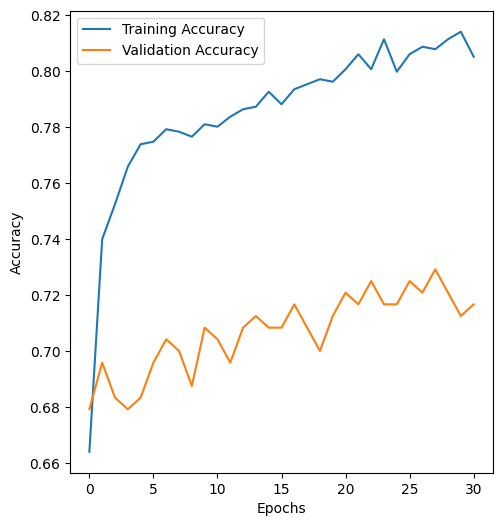

In [62]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

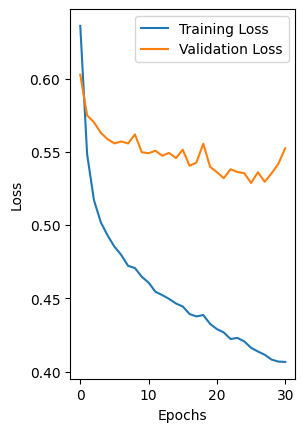

In [63]:
plt.subplot(1, 2, 2)
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# ANSWER 19

In [64]:
y_pred = model.predict(X_test_scaled)
y_pred_binary = np.round(y_pred)

8/8 [==============================] - 0s 3ms/step


In [65]:
accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
classification_rep = classification_report(y_test, y_pred_binary)

In [66]:
print("Test Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Test Accuracy: 0.7833333333333333
Confusion Matrix:
 [[ 85  25]
 [ 27 103]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.77      0.77       110
           1       0.80      0.79      0.80       130

    accuracy                           0.78       240
   macro avg       0.78      0.78      0.78       240
weighted avg       0.78      0.78      0.78       240

